In [24]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

何故かエラーが出る
エラーと格闘して2日後、メッシュを作らずデータを作っていたことが判明
一度先生に相談しようと思っていたが、ケアレスミスに気づいて直した

In [10]:
saitamamesh1 = gpd.read_file('saitamadata/SDDSWS5338.zip')
saitamamesh2 = gpd.read_file('saitamadata/SDDSWS5339.zip')
saitamamesh3 = gpd.read_file('saitamadata/SDDSWS5438.zip')
saitamamesh4 = gpd.read_file('saitamadata/SDDSWS5438.zip')


In [11]:
# combine all four mesh shapes
saitamamesh = gpd.pd.concat([saitamamesh1,saitamamesh2,saitamamesh3,saitamamesh4])

<Axes: >

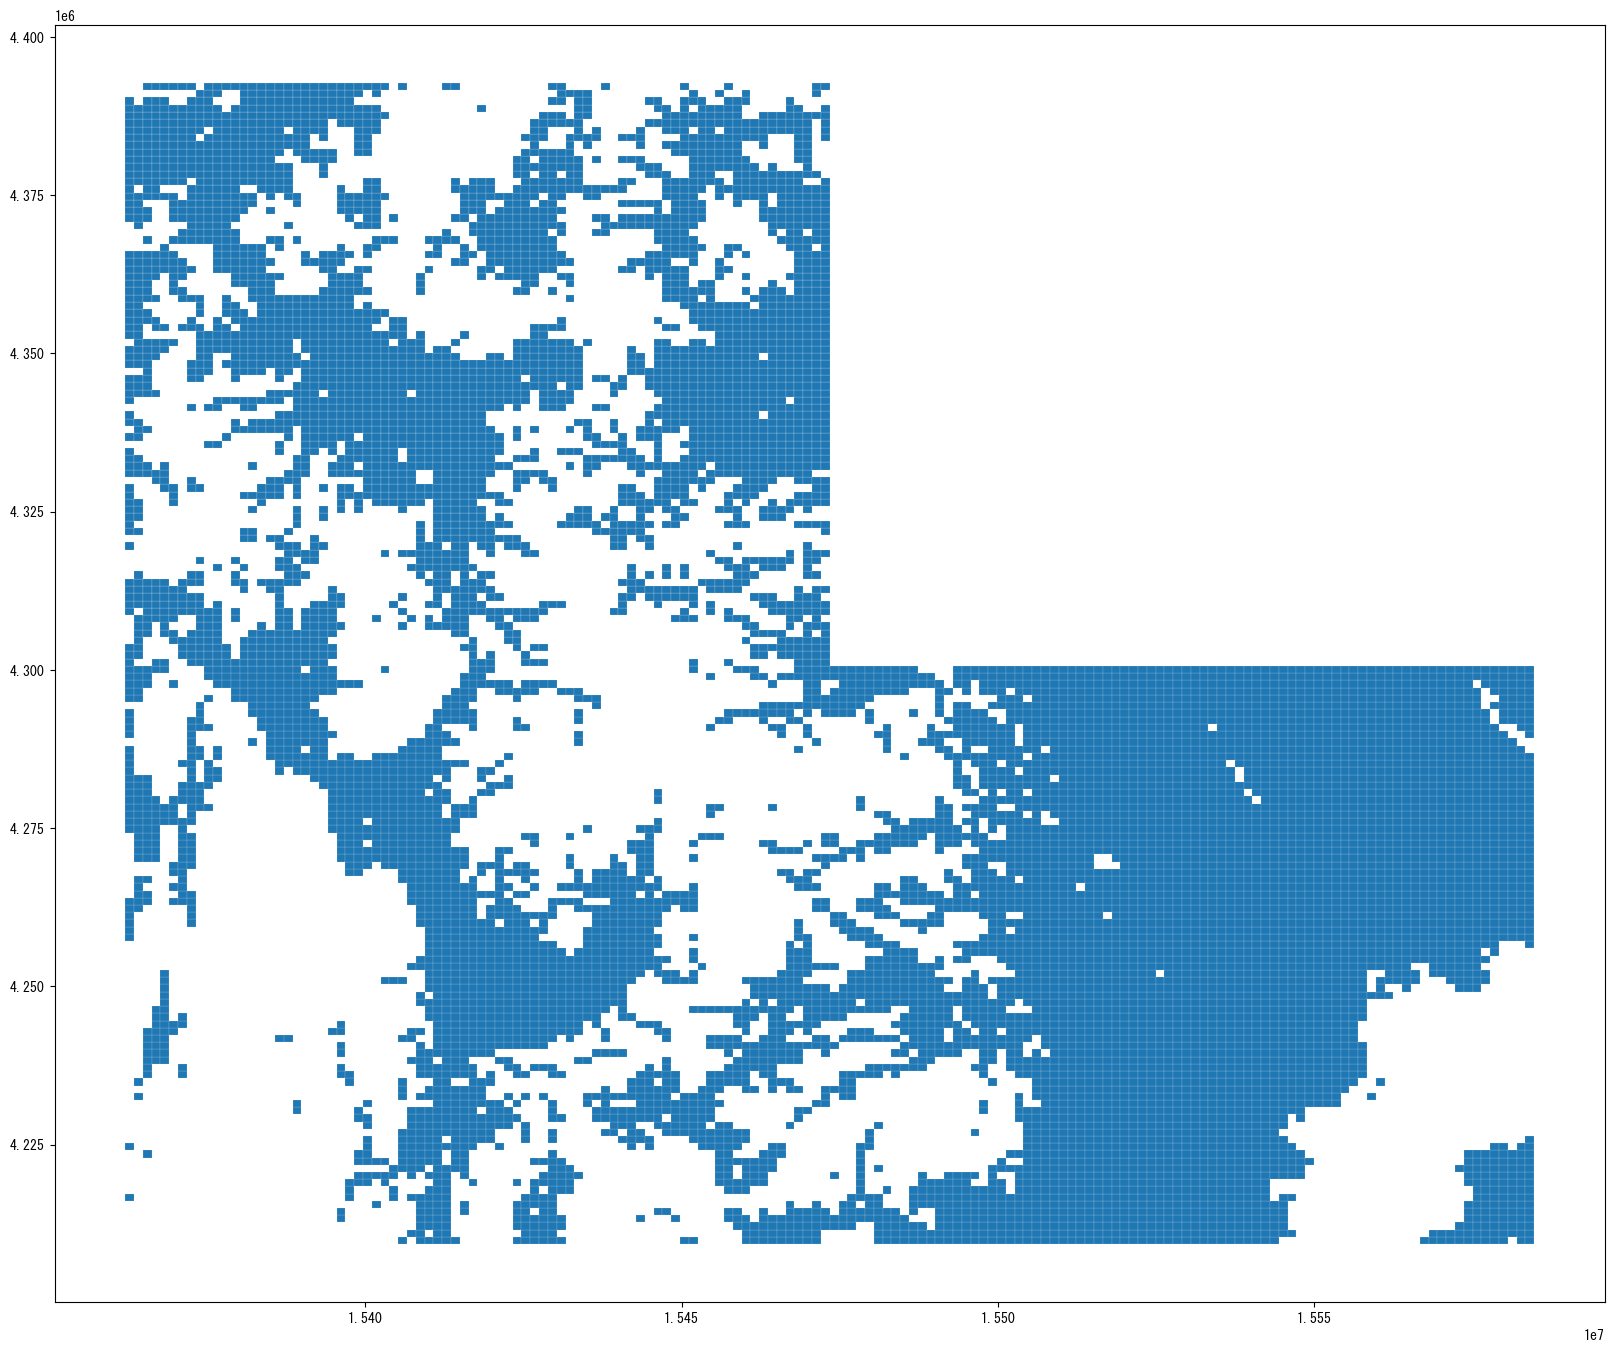

In [45]:
# quick plot
saitamamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

何故か右上が映らない
5339がダウンロード出来てないのかなと思ったが、そんなことはなかった
原因不明
解決はしていないが、エラーは出てないので一旦コミットしようと思う

In [13]:
saitamamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,53380000,5338,00,00,1,"POLYGON ((138.01250 35.33333, 138.00000 35.333..."
1,53380001,5338,00,01,2,"POLYGON ((138.02500 35.33333, 138.01250 35.333..."
2,53380002,5338,00,02,3,"POLYGON ((138.03750 35.33333, 138.02500 35.333..."
3,53380003,5338,00,03,4,"POLYGON ((138.05000 35.33333, 138.03750 35.333..."
4,53380004,5338,00,04,5,"POLYGON ((138.06250 35.33333, 138.05000 35.333..."


In [44]:
saitamadata1 = pd.read_csv('saitamadata/tblT001100S5338.zip', encoding='cp932')
saitamadata4 = pd.read_csv('saitamadata/tblT001100S5339.zip', encoding='cp932')
saitamadata2 = pd.read_csv('saitamadata/tblT001100S5438.zip', encoding='cp932')
saitamadata3 = pd.read_csv('saitamadata/tblT001100S5439.zip', encoding='cp932')

In [16]:
saitamadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,53380060.0,1.0,NaN,53381022;53381030,8,4,4,0,0,0,...,0,0,5,5,0,0,7,0,3,4
2,53380234.0,2.0,53380275.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,53380244.0,2.0,53380275.0,NaN,1,0,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,53380258.0,2.0,53380275.0,NaN,1,1,0,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [18]:
# ４つのテーブルから１行目を削除
saitamadata1 = saitamadata1[1:]
saitamadata2 = saitamadata2[1:]
saitamadata3 = saitamadata3[1:]
saitamadata4 = saitamadata4[1:]

In [19]:
saitamadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53380060.0,1.0,NaN,53381022;53381030,8,4,4,0,0,0,...,0,0,5,5,0,0,7,0,3,4
2,53380234.0,2.0,53380275.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,53380244.0,2.0,53380275.0,NaN,1,0,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,53380258.0,2.0,53380275.0,NaN,1,1,0,*,*,*,...,*,*,*,*,*,*,*,*,*,*
5,53380265.0,2.0,53380275.0,NaN,2,0,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [20]:
saitamadata2.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54380000.0,2.0,54380010.0,NaN,5,2,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,54380003.0,1.0,NaN,54380004,69,32,37,2,2,0,...,0,0,24,19,5,1,30,0,10,7
3,54380004.0,2.0,54380003.0,NaN,5,4,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,54380007.0,0.0,NaN,NaN,235,100,135,10,4,6,...,1,0,49,39,10,1,44,0,6,15
5,54380008.0,0.0,NaN,NaN,951,459,492,101,51,50,...,14,4,273,223,50,28,230,5,63,63


In [21]:
saitamadata3.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54390001.0,0.0,NaN,NaN,13,6,7,2,1,1,...,0,0,5,5,0,0,4,0,0,3
2,54390002.0,0.0,NaN,NaN,275,119,156,21,6,15,...,2,1,72,51,21,6,56,0,11,14
3,54390003.0,0.0,NaN,NaN,110,58,52,8,4,4,...,1,0,33,27,6,2,27,0,8,6
4,54390004.0,0.0,NaN,NaN,56,31,25,1,0,1,...,0,0,17,12,5,0,14,0,3,3
5,54390005.0,0.0,NaN,NaN,735,325,410,82,37,45,...,4,3,178,159,19,18,117,7,32,31


In [22]:
saitamadata4.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53390005.0,0.0,NaN,NaN,52,29,23,1,1,0,...,1,0,17,15,2,0,16,0,3,6
2,53390006.0,2.0,53390007.0,NaN,3,2,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,53390007.0,1.0,NaN,53390006,147,68,79,11,4,7,...,2,0,48,35,13,2,41,0,5,15
4,53390008.0,0.0,NaN,NaN,783,394,389,105,57,48,...,11,3,225,177,48,26,182,1,36,56
5,53390009.0,0.0,NaN,NaN,3764,1791,1973,507,267,240,...,24,9,1097,965,132,134,642,18,125,209


ここまで順調

In [25]:
# ４つのテーブルから「＊」を非数に置き換える
saitamadata1 = saitamadata1.replace('*', np.nan)
saitamadata2 = saitamadata2.replace('*', np.nan)
saitamadata3 = saitamadata3.replace('*', np.nan)
saitamadata4 = saitamadata4.replace('*', np.nan)

またエラーが出た
原因は簡単で、最初に書いたコードを読み込んでいなかったからだ

In [26]:
saitamadata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53380060.0,1.0,NaN,53381022;53381030,8,4,4,0,0,0,...,0,0,5,5,0,0,7,0,3,4
2,53380234.0,2.0,53380275.0,NaN,2,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53380244.0,2.0,53380275.0,NaN,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53380258.0,2.0,53380275.0,NaN,1,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,53380265.0,2.0,53380275.0,NaN,2,0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
saitamadata2.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54380000.0,2.0,54380010.0,NaN,5,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54380003.0,1.0,NaN,54380004,69,32,37,2,2,0,...,0,0,24,19,5,1,30,0,10,7
3,54380004.0,2.0,54380003.0,NaN,5,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54380007.0,0.0,NaN,NaN,235,100,135,10,4,6,...,1,0,49,39,10,1,44,0,6,15
5,54380008.0,0.0,NaN,NaN,951,459,492,101,51,50,...,14,4,273,223,50,28,230,5,63,63


In [28]:
saitamadata3.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54390001.0,0.0,NaN,NaN,13,6,7,2,1,1,...,0,0,5,5,0,0,4,0,0,3
2,54390002.0,0.0,NaN,NaN,275,119,156,21,6,15,...,2,1,72,51,21,6,56,0,11,14
3,54390003.0,0.0,NaN,NaN,110,58,52,8,4,4,...,1,0,33,27,6,2,27,0,8,6
4,54390004.0,0.0,NaN,NaN,56,31,25,1,0,1,...,0,0,17,12,5,0,14,0,3,3
5,54390005.0,0.0,NaN,NaN,735,325,410,82,37,45,...,4,3,178,159,19,18,117,7,32,31


In [29]:
saitamadata4.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53390005.0,0.0,NaN,NaN,52,29,23,1,1,0,...,1,0,17,15,2,0,16,0,3,6
2,53390006.0,2.0,53390007.0,NaN,3,2,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53390007.0,1.0,NaN,53390006,147,68,79,11,4,7,...,2,0,48,35,13,2,41,0,5,15
4,53390008.0,0.0,NaN,NaN,783,394,389,105,57,48,...,11,3,225,177,48,26,182,1,36,56
5,53390009.0,0.0,NaN,NaN,3764,1791,1973,507,267,240,...,24,9,1097,965,132,134,642,18,125,209


In [30]:
saitamadata = pd.concat([saitamadata1,saitamadata2,saitamadata3,saitamadata4])

In [31]:
# check data info
saitamadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15362 entries, 1 to 4691
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    15362 non-null  float64
 1   HTKSYORI    15362 non-null  float64
 2   HTKSAKI     1187 non-null   float64
 3   GASSAN      948 non-null    object 
 4   T001100001  15362 non-null  object 
 5   T001100002  15362 non-null  object 
 6   T001100003  15362 non-null  object 
 7   T001100004  14175 non-null  object 
 8   T001100005  14175 non-null  object 
 9   T001100006  14175 non-null  object 
 10  T001100007  14175 non-null  object 
 11  T001100008  14175 non-null  object 
 12  T001100009  14175 non-null  object 
 13  T001100010  14175 non-null  object 
 14  T001100011  14175 non-null  object 
 15  T001100012  14175 non-null  object 
 16  T001100013  14175 non-null  object 
 17  T001100014  14175 non-null  object 
 18  T001100015  14175 non-null  object 
 19  T001100016  14175 non-null  obj

In [32]:

# まずはカラムをアウトプット
saitamadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [33]:
# 4番目以降をアウトプット
saitamadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [34]:
# このカラムをテーブル形式で見る
saitamadata[saitamadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,8,4,4,0,0,0,13,6,7,2,...,0,0,5,5,0,0,7,0,3,4
2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,379,179,200,35,18,17,344,161,183,153,...,6,2,77,51,26,8,62,0,7,9
4688,228,117,111,29,15,14,199,102,97,118,...,4,2,60,43,17,1,49,3,9,15
4689,53,30,23,6,3,3,47,27,20,28,...,0,1,11,7,4,0,11,7,3,2
4690,541,265,276,54,29,25,486,235,251,277,...,6,2,161,122,39,13,138,0,28,38


In [35]:
# objectからfloatに変換
saitamadata[saitamadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,8.0,4.0,4.0,0.0,0.0,0.0,13.0,6.0,7.0,2.0,...,0.0,0.0,5.0,5.0,0.0,0.0,7.0,0.0,3.0,4.0
2,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,379.0,179.0,200.0,35.0,18.0,17.0,344.0,161.0,183.0,153.0,...,6.0,2.0,77.0,51.0,26.0,8.0,62.0,0.0,7.0,9.0
4688,228.0,117.0,111.0,29.0,15.0,14.0,199.0,102.0,97.0,118.0,...,4.0,2.0,60.0,43.0,17.0,1.0,49.0,3.0,9.0,15.0
4689,53.0,30.0,23.0,6.0,3.0,3.0,47.0,27.0,20.0,28.0,...,0.0,1.0,11.0,7.0,4.0,0.0,11.0,7.0,3.0,2.0
4690,541.0,265.0,276.0,54.0,29.0,25.0,486.0,235.0,251.0,277.0,...,6.0,2.0,161.0,122.0,39.0,13.0,138.0,0.0,28.0,38.0


In [36]:
# 元のデータを入れ替える
saitamadata[saitamadata.columns[4:]]=saitamadata[saitamadata.columns[4:]].astype(float)

In [37]:
# check!
saitamadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15362 entries, 1 to 4691
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    15362 non-null  float64
 1   HTKSYORI    15362 non-null  float64
 2   HTKSAKI     1187 non-null   float64
 3   GASSAN      948 non-null    object 
 4   T001100001  15362 non-null  float64
 5   T001100002  15362 non-null  float64
 6   T001100003  15362 non-null  float64
 7   T001100004  14175 non-null  float64
 8   T001100005  14175 non-null  float64
 9   T001100006  14175 non-null  float64
 10  T001100007  14175 non-null  float64
 11  T001100008  14175 non-null  float64
 12  T001100009  14175 non-null  float64
 13  T001100010  14175 non-null  float64
 14  T001100011  14175 non-null  float64
 15  T001100012  14175 non-null  float64
 16  T001100013  14175 non-null  float64
 17  T001100014  14175 non-null  float64
 18  T001100015  14175 non-null  float64
 19  T001100016  14175 non-null  flo

In [38]:
# KEY_CODEをfloatに
saitamamesh['KEY_CODE']=saitamamesh['KEY_CODE'].astype(float)

In [39]:
# merge the data
saitamamesh = saitamamesh.merge(saitamadata, on='KEY_CODE')

In [40]:
# check!
saitamamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
177,53380782.0,5338,07,82,783,"POLYGON ((138.91250 35.40000, 138.90000 35.400...",2.0,53380781.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9337,54383531.0,5438,35,31,2932,"POLYGON ((138.65000 36.27500, 138.63750 36.275...",1.0,NaN,54383553,36.0,...,1.0,0.0,12.0,9.0,3.0,1.0,14.0,0.0,4.0,3.0
8798,54383179.0,5438,31,79,2580,"POLYGON ((138.25000 36.30833, 138.23750 36.308...",0.0,NaN,NaN,346.0,...,5.0,4.0,103.0,82.0,21.0,7.0,102.0,1.0,17.0,41.0
10415,54384510.0,5438,45,10,3711,"POLYGON ((138.63750 36.34167, 138.62500 36.341...",0.0,NaN,NaN,914.0,...,3.0,2.0,258.0,222.0,36.0,14.0,224.0,19.0,62.0,71.0
3024,53392182.0,5339,21,82,1783,"POLYGON ((139.16250 35.56667, 139.15000 35.566...",0.0,NaN,NaN,53.0,...,1.0,1.0,15.0,12.0,3.0,0.0,17.0,0.0,4.0,7.0


In [41]:
# reproject to 3857 (web mercator)
saitamamesh = saitamamesh.to_crs(3857)

ここまで順調

<Axes: >

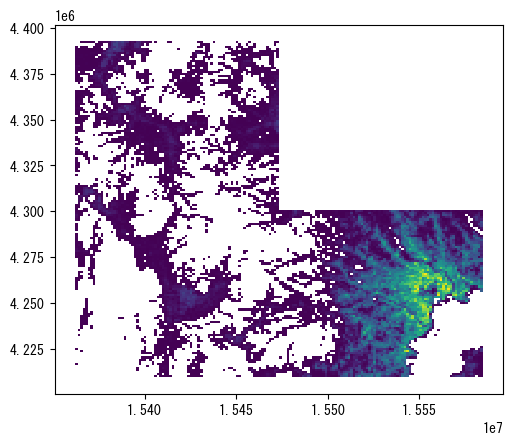

In [42]:
# make a quick plot
saitamamesh.plot(column='T001100001')

やっぱり右上が映らない
しかし右下に人口が集中していることは分かる
(これって埼玉じゃなくて東京23区かもしれない)

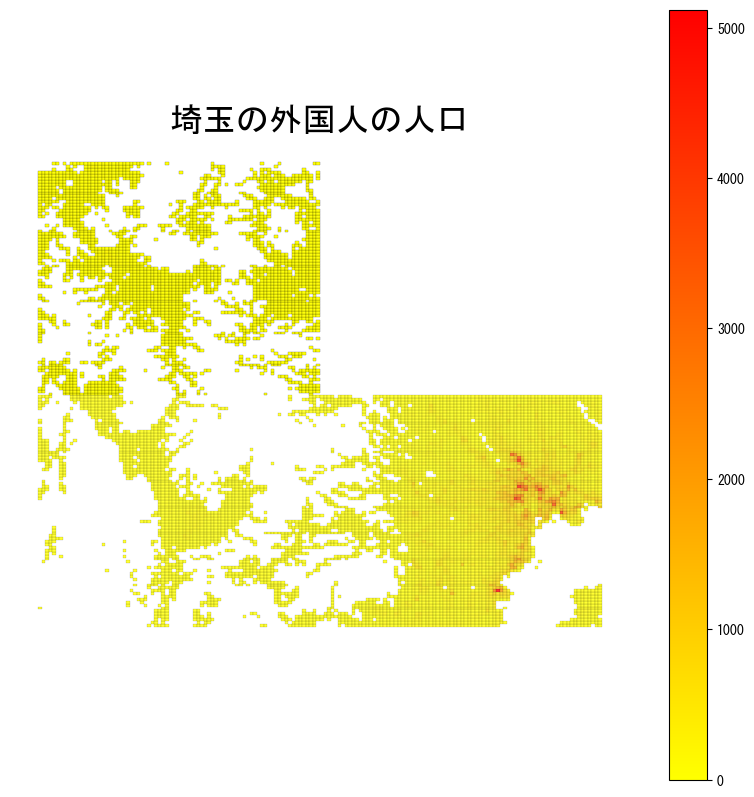

In [46]:
# population map
ax=saitamamesh.plot(figsize=(10,10),
         column='T001100031',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('埼玉の外国人の人口',fontsize=24);



これも右上が映らない
しかしこれも右下に外国人の人口が多いことが分かる

一旦ここでコミットすることにする
